In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import cmocean as cmo
import seaborn as sb

In [2]:
def composites_doy(var): 
    ds = xr.open_dataset(f'/work/Katherine.Turner/tempest-extremes/ESM4/{var}/comp_{var}_anom.nc', use_cftime=True)
    
    test = ds[f'snap_{var}_anom']
    test = xr.where(abs(test)>1e10, np.nan, test)
    test = xr.where(test==0, np.nan, test)

    X = np.meshgrid(ds.x.data,ds.y.data)
    mask = xr.DataArray(np.sqrt(X[0]**2 + X[1]**2) <= 10, dims=['x', 'y'])
    masked_var = xr.where(mask, test, np.nan)

    # subsample for periods that we have ocean output (daily, timestamp is 12:00:00)

    ds.snap_time.dt.hour == 12
    time = ds.snap_time[ds.snap_time.dt.hour == 12]
    snap = ds.snapshot[ds.snap_time.dt.hour == 12]

    flux = masked_var[:,:,ds.snap_time.dt.hour == 12]

    # create a dataset to group snapshots by day of year

    ds_masked = ds = xr.Dataset(
        data_vars=dict(
            flux=(["x", "y", "snapshot"], flux.data),
            time=(["snapshot"], time.data),
        ),
        coords=dict(
            x=ds.x.data,
            y=ds.y.data,
            snapshot=snap.data,
        ),
        attrs=dict(description=f"{var} snapshots"),
    )

    flux_avg_tot = flux.mean(dim="snapshot")
    flux_avg_doy = ds_masked.flux.groupby(time.dt.dayofyear).mean(skipna=True)
    
    return flux_avg_tot, flux_avg_doy, time

In [3]:
#o2_tot, o2_doy, time1 = composites_doy('o2_stf_gas')
dic_tot, dic_doy, time_0 = composites_doy('dic_stf_gas')
hfds_tot, hfds_doy, time_1 = composites_doy('hfds')

In [6]:
r = 10 * 111e3
dx = 0.5 * 111e3
dt = 24 * 60**2

avg_stormdays_yr = time_0.groupby(time_0.dt.year).count()
avg_storms_day = time_0.groupby(time_0.dt.dayofyear).count() / 80

# using seasonal cycle of the storm-centered anomalies, create a daily climatology
hfds_ann_cycle_1 = np.pi * r**2 * hfds_tot.mean(dim={"x", "y"}, skipna=True) * avg_storms_day
hfds_ann_cycle_2 = np.pi * r**2 * hfds_doy.mean(dim={"x", "y"}, skipna=True) * avg_storms_day

dic_ann_cycle_1 = np.pi * r**2 * dic_tot.mean(dim={"x", "y"}, skipna=True) * avg_storms_day * 24 * 60**2 * 12.011
dic_ann_cycle_2 = np.pi * r**2 * dic_doy.mean(dim={"x", "y"}, skipna=True) * avg_storms_day * 24 * 60**2 * 12.011 


In [6]:
#24*60**2*hfds_ann_cycle_2.sum('dayofyear')
dic_ann_cycle_1.sum('dayofyear')

<xarray.DataArray ()>
array(-4.20651075e+13)

In [ ]:
fig, axs = plt.subplots(ncols=4, nrows=3, figsize=(9,5.5))
axs=axs.flatten()

hfds_doy[:,:,0:31].mean('dayofyear').plot(y='y', ax=axs[0], vmin=-40, vmax=40, extend='neither', cmap=plt.get_cmap('RdBu'),
                                              cbar_kwargs={"aspect":15, "shrink":0.9, "label":"W m$^{-2}$"})
hfds_doy[:,:,31:59].mean('dayofyear').plot(y='y', ax=axs[1], vmin=-40, vmax=40, extend='neither', cmap=plt.get_cmap('RdBu'),
                                              cbar_kwargs={"aspect":15, "shrink":0.9, "label":"W m$^{-2}$"})
hfds_doy[:,:,59:90].mean('dayofyear').plot(y='y', ax=axs[2], vmin=-40, vmax=40, extend='neither', cmap=plt.get_cmap('RdBu'),
                                              cbar_kwargs={"aspect":15, "shrink":0.9, "label":"W m$^{-2}$"})
hfds_doy[:,:,90:120].mean('dayofyear').plot(y='y', ax=axs[3], vmin=-40, vmax=40, extend='neither', cmap=plt.get_cmap('RdBu'),
                                              cbar_kwargs={"aspect":15, "shrink":0.9, "label":"W m$^{-2}$"})
hfds_doy[:,:,120:151].mean('dayofyear').plot(y='y', ax=axs[4], vmin=-40, vmax=40, extend='neither', cmap=plt.get_cmap('RdBu'),
                                              cbar_kwargs={"aspect":15, "shrink":0.9, "label":"W m$^{-2}$"})
hfds_doy[:,:,151:181].mean('dayofyear').plot(y='y', ax=axs[5], vmin=-40, vmax=40, extend='neither', cmap=plt.get_cmap('RdBu'),
                                              cbar_kwargs={"aspect":15, "shrink":0.9, "label":"W m$^{-2}$"})
hfds_doy[:,:,181:212].mean('dayofyear').plot(y='y', ax=axs[6], vmin=-40, vmax=40, extend='neither', cmap=plt.get_cmap('RdBu'),
                                              cbar_kwargs={"aspect":15, "shrink":0.9, "label":"W m$^{-2}$"})
hfds_doy[:,:,212:243].mean('dayofyear').plot(y='y', ax=axs[7], vmin=-40, vmax=40, extend='neither', cmap=plt.get_cmap('RdBu'),
                                              cbar_kwargs={"aspect":15, "shrink":0.9, "label":"W m$^{-2}$"})
hfds_doy[:,:,243:273].mean('dayofyear').plot(y='y', ax=axs[8], vmin=-40, vmax=40, extend='neither', cmap=plt.get_cmap('RdBu'),
                                              cbar_kwargs={"aspect":15, "shrink":0.9, "label":"W m$^{-2}$"})
hfds_doy[:,:,273:304].mean('dayofyear').plot(y='y', ax=axs[9], vmin=-40, vmax=40, extend='neither', cmap=plt.get_cmap('RdBu'),
                                              cbar_kwargs={"aspect":15, "shrink":0.9, "label":"W m$^{-2}$"})
hfds_doy[:,:,304:334].mean('dayofyear').plot(y='y', ax=axs[10], vmin=-40, vmax=40, extend='neither', cmap=plt.get_cmap('RdBu'),
                                              cbar_kwargs={"aspect":15, "shrink":0.9, "label":"W m$^{-2}$"})
hfds_doy[:,:,334:365].mean('dayofyear').plot(y='y', ax=axs[11], vmin=-40, vmax=40, extend='neither', cmap=plt.get_cmap('RdBu'),
                                              cbar_kwargs={"aspect":15, "shrink":0.9, "label":"W m$^{-2}$"})



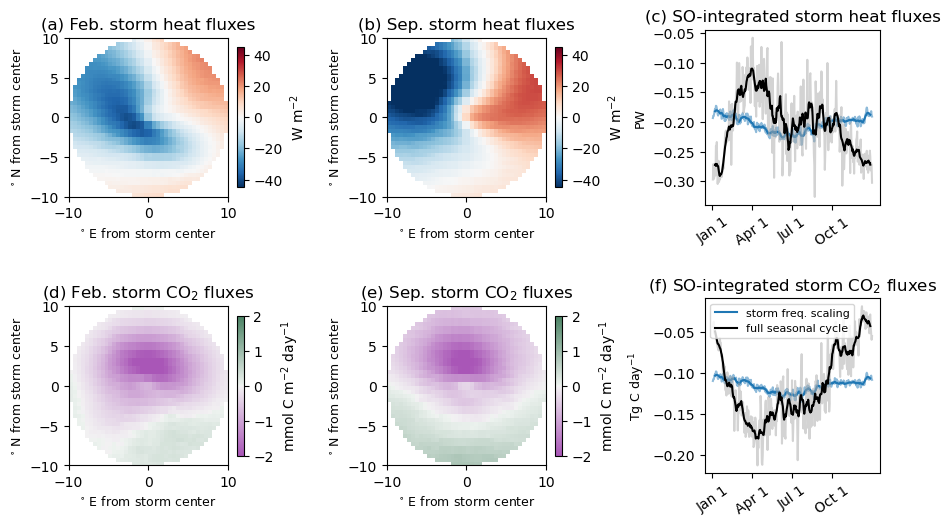

In [7]:
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(9,5.5))
axs=axs.flatten()

hfds_doy[:,:,31:59].mean('dayofyear').plot(y='y', ax=axs[0], vmin=-45, vmax=45, extend='neither', cmap=plt.get_cmap('RdBu_r'),
                                              cbar_kwargs={"aspect":20, "shrink":0.8, "fraction":0.04, "label":"W m$^{-2}$"})

hfds_doy[:,:,242:273].mean('dayofyear').plot(y='y', ax=axs[1], vmin=-45, vmax=45, extend='neither', cmap=plt.get_cmap('RdBu_r'),
                                                #cbar_kwargs={"aspect":15, "shrink":0.9, "label":"W m$^{-2}$"})
                                                cbar_kwargs={"aspect":20, "shrink":0.8, "fraction":0.04, "label":"W m$^{-2}$"})

(1e-15*hfds_ann_cycle_1).plot(ax=axs[2], alpha=0.5)
(1e-15*hfds_ann_cycle_1).rolling(dayofyear=10, center=True).mean().plot(ax=axs[2], color='#1f77b4')
(1e-15*hfds_ann_cycle_2).plot(ax=axs[2], color='darkgrey', alpha=0.5)
(1e-15*hfds_ann_cycle_2).rolling(dayofyear=10, center=True).mean().plot(ax=axs[2], color='black')

(1e3* 60**2 * 24 * dic_doy[:,:,31:59]).mean('dayofyear').plot(y='y', ax=axs[3], vmin=-2, vmax=2, extend='neither', 
                                                              cmap=sb.diverging_palette(300, 145, s=60, as_cmap=True),
                                              #cbar_kwargs={"aspect":15, "shrink":0.9, "label":"mmol C m$^{-2}$ day$^{-1}$"})
                                              cbar_kwargs={"aspect":20, "shrink":0.8, "fraction":0.04, "label":"mmol C m$^{-2}$ day$^{-1}$"})

(1e3* 60**2 * 24 *dic_doy[:,:,242:273]).mean('dayofyear').plot(y='y', ax=axs[4], vmin=-2, vmax=2, extend='neither', 
                                                               cmap=sb.diverging_palette(300, 145, s=60, as_cmap=True),
                                              #cbar_kwargs={"aspect":15, "shrink":0.9, "label":"mmol C m$^{-2}$ day$^{-1}$"})
                                              cbar_kwargs={"aspect":20, "shrink":0.8, "fraction":0.04, "label":"mmol C m$^{-2}$ day$^{-1}$"})

(1e-12 * dic_ann_cycle_1).plot(ax=axs[5], alpha=0.5)
(1e-12 * dic_ann_cycle_1).rolling(dayofyear=10, center=True).mean().plot(ax=axs[5], color='#1f77b4', label="storm freq. scaling")
(1e-12 * dic_ann_cycle_2).plot(ax=axs[5], color='darkgrey', alpha=0.5)
(1e-12 * dic_ann_cycle_2).rolling(dayofyear=10, center=True).mean().plot(ax=axs[5], color='black', label="full seasonal cycle")
axs[5].legend(fontsize=8)

titles = ["(a) Feb. storm heat fluxes", 
          "(b) Sep. storm heat fluxes", 
          "(c) SO-integrated storm heat fluxes",
          "(d) Feb. storm CO$_2$ fluxes",
          "(e) Sep. storm CO$_2$ fluxes",
          "(f) SO-integrated storm CO$_2$ fluxes"]

for i in np.arange(6):
    axs[i].set_box_aspect(1)
    axs[i].set_xlabel('$^{\circ}$ E from storm center', fontsize=9)
    axs[i].set_ylabel('$^{\circ}$ N from storm center', fontsize=9)
    axs[i].set_title(titles[i])
    
axs[2].set_ylabel('PW', fontsize=9)
axs[2].set_xlabel('')
axs[5].set_ylabel('Tg C day$^{-1}$', fontsize=9)
axs[5].set_xlabel('')

for i in [2,5]:
    axs[i].set_xticks([0, 90, 181, 273])
    axs[i].set_xticklabels(['Jan 1', 'Apr 1', 'Jul 1', 'Oct 1'])
    axs[i].tick_params(axis='x', rotation=35)

plt.tight_layout()
plt.savefig("/work/Katherine.Turner/CM4_storms/analysis_figures/ESM4_seasonal_composites.png", dpi=100, format="png", bbox_inches="tight")
plt.savefig("/home/Katherine.Turner/Figures/ESM4_seasonal_composites.png", dpi=100, format="png", bbox_inches="tight")
#plt.savefig("/home/Katherine.Turner/ESM4_seasonal_composites.eps", dpi=100, format="eps")

## Creating seasonal composites of storms

In [2]:
def mask_composite(ds, var, start_year=0, min_lat=-90, max_lat=90, min_lon=0, max_lon=360):
    X = np.meshgrid(ds.x.data,ds.y.data)
    mask = xr.DataArray(np.sqrt(X[0]**2 + X[1]**2) <= 10, dims=['x', 'y'])
    
    idx_region = (ds.snap_time.dt.hour == 12) & (ds.snap_time.dt.year > start_year) & (ds.snap_lat >= min_lat) & (ds.snap_lat <= max_lat) & \
    (ds.snap_lon >= min_lon) & (ds.snap_lon <= max_lon)
    
    test = ds[f"snap_{var}"][idx_region,:,:]
    test = xr.where(abs(test)>1e10, np.nan, test)
    test = xr.where(test==0, np.nan, test)
    
    time = ds.snap_time[idx_region]

    out_masked = xr.where(mask, test, np.nan)
    return out_masked, time

In [3]:
ds1 = xr.open_dataset(f'/work/Katherine.Turner/tempest-extremes/odiv-251/comp_f_dic/comp_dic_stf_gas_anom.nc', use_cftime=True)
ds2 = xr.open_dataset(f'/work/Katherine.Turner/tempest-extremes/odiv-251/comp_hfds/comp_hfds_anom.nc', use_cftime=True)

dic_masked, time1 = mask_composite(ds1, 'dic_stf_gas_anom')
heat_masked, time2 = mask_composite(ds2, 'hfds_anom')

In [4]:
dic_season = dic_masked.groupby(time1.dt.season).mean()
heat_season = heat_masked.groupby(time2.dt.season).mean()

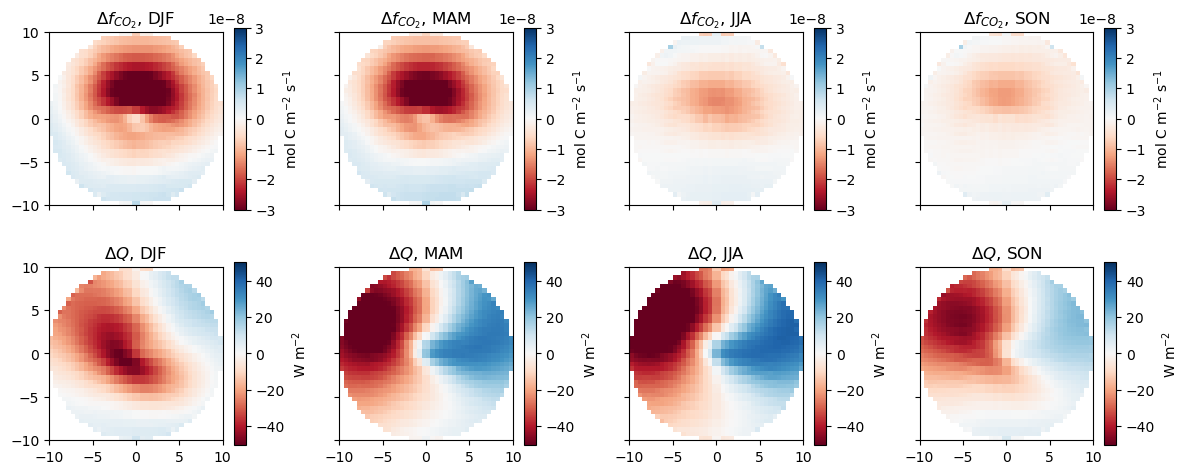

In [11]:
mon = ["DJF", "MAM", "JJA", "SON"]

fig, axs = plt.subplots(ncols=4, nrows=2, sharey=True, sharex=True, figsize=(12,5))
axs=axs.flatten()

for i, name in enumerate(mon):
    dic_season.sel(season=name).plot(ax=axs[i], y='y', vmin=-3e-8, vmax=3e-8, cmap="RdBu", extend="neither",
                                    cbar_kwargs={"aspect":15, "shrink":0.9, "label":"mol C m$^{-2}$ s$^{-1}$"})
    axs[i].set_title('$\Delta f_{CO_2}$' + f', {mon[i]}')
    heat_season.sel(season=name).plot(ax=axs[4+i], y='y', vmin=-50, vmax=50, cmap="RdBu", extend="neither",
                                     cbar_kwargs={"aspect":15, "shrink":0.9, "label":"W m$^{-2}$"})
    axs[i+4].set_title('$\Delta Q$' + f', {mon[i]}')
    
for i in np.arange(8):
    axs[i].set_aspect(1)
    axs[i].set_ylabel('')
    axs[i].set_xlabel('')
    
plt.tight_layout()
plt.savefig("/home/Katherine.Turner/Figures/fluxes_seasonal.png", format="png", dpi=100)

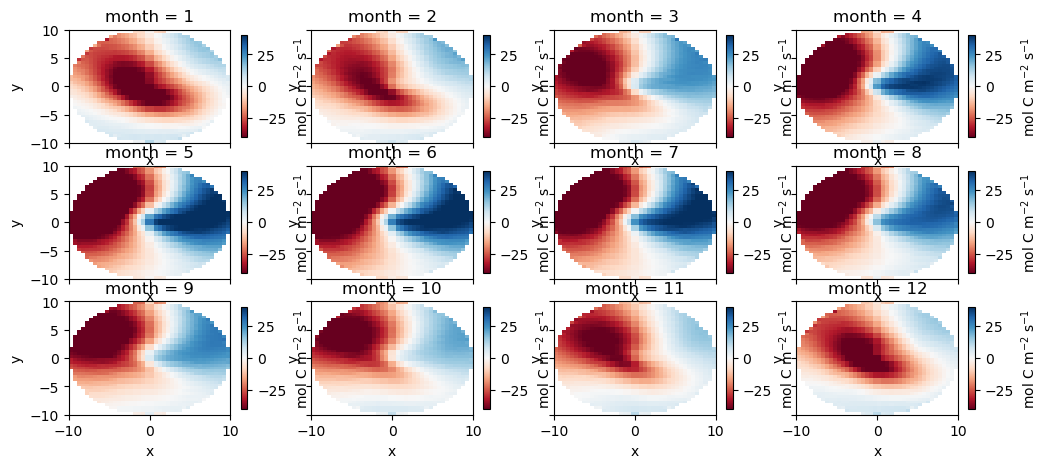

In [6]:
heat_m = heat_masked.groupby(time2.dt.month).mean()

fig, axs = plt.subplots(ncols=4, nrows=3, sharey=True, sharex=True, figsize=(12,5))
axs=axs.flatten()

for i in np.arange(12):
    heat_m[:,:,i].plot(ax=axs[i], y='y', vmin=-40, vmax=40, cmap="RdBu", extend="neither",
                                    cbar_kwargs={"aspect":15, "shrink":0.9, "label":"mol C m$^{-2}$ s$^{-1}$"})

In [9]:
test = heat_masked.groupby(time2.dt.dayofyear).sum()

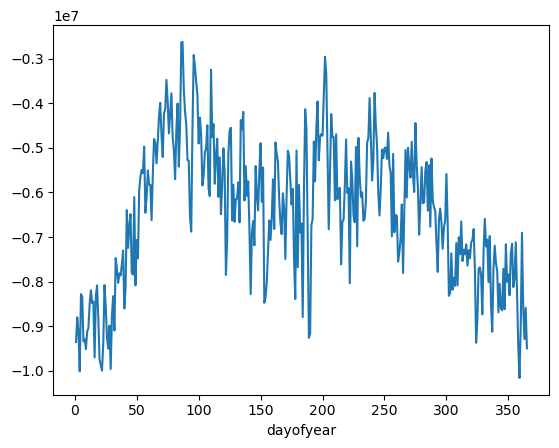

In [10]:
test.sum(dim=['x','y']).plot()